<a href="https://colab.research.google.com/github/Ayoyinka-Sofuwa/Fastai-projects/blob/main/Gradio_deployment_fastai_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car classifier - 4 different car types

In [67]:
pip install -Uqq fastai

In [68]:
pip install -Uqq fastbook

In [69]:
!pip install -Uqq fastai duckduckgo_search

In [70]:
from fastai import *

In [71]:
from fastbook import *
from fastai.vision import *

### Gathering data

There are many data sources all over the internet, here we'll be using duckduckgo search engine to complete a car detector project through search, we're going to classify cars into 4 different types, "Sedan", "SUV", "Coupe" and "Hatchback".
We'll acheive this by downloading the images, training our model on the data, cleaning the data and see if we can have any improvements. Before we move to deployment. 

In [72]:
#fastbook function
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [73]:
images = search_images_ddg("sedan")
len(images)

200

we have downloaded 200 images of sedans

In [74]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
  print(f"searching for {term}")
  return L(ddg_images(term, max_results = max_images)).itemgot("image")

searching for suv photos


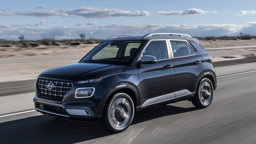

In [75]:
download_url(search_images("suv photos", max_images=1)[0], "suv.jpg", show_progress=False)

Image.open("suv.jpg").to_thumb(256, 256)

searching for coupe photos


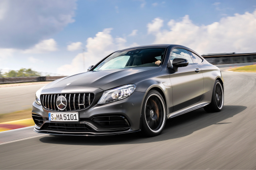

In [76]:
download_url(search_images("coupe photos", max_images=1)[0], "coupe.jpg", show_progress=False)

Image.open("coupe.jpg").to_thumb(256, 256)

searching for hatchback photos


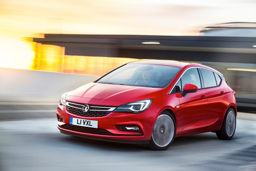

In [77]:
download_url(search_images("hatchback photos", max_images=1)[0], "hatchback.jpg", show_progress=False)

Image.open("hatchback.jpg").to_thumb(256, 256)

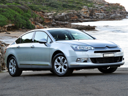

In [78]:
dest = "sedan.jpg"
download_url(images[0], dest, show_progress=True)

im = Image.open(dest)
im.to_thumb(128,128)

In [79]:
searches = "sedan", "suv", "coupe", "hatchback"
path = Path('car_types')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    resize_images(path/o, max_size=400, dest=path/o)

searching for sedan photo
searching for suv photo
searching for coupe photo
searching for hatchback photo


In [80]:
fns = get_image_files(path)
fns

(#222) [Path('car_types/sedan/b39bd123-bc31-4c5b-bcdf-90cd86d5103b.jpg'),Path('car_types/sedan/27c71078-48a4-4236-b762-fb522baf344c.jpg'),Path('car_types/sedan/7a01c60c-485e-4a96-a657-4614d0e1fdf2.jpg'),Path('car_types/sedan/3c6eec06-60d6-4958-89dc-76a769b8a32f.jpg'),Path('car_types/sedan/00130e55-02ad-4dda-8a95-79f323423a85.jpg'),Path('car_types/sedan/d3b6b4ad-f145-4410-b3f3-dc651bf00764.jpg'),Path('car_types/sedan/06369eeb-4993-4104-b7b5-08feef2b9f1b.jpg'),Path('car_types/sedan/648bfd18-628b-441e-bd94-1f55d3ac7428.jpg'),Path('car_types/sedan/fc521287-51f5-41b5-b73d-3ff385a6e4d5.jpg'),Path('car_types/sedan/4e9a34e9-4d54-4980-b0eb-7b07a2b6f766.jpg')...]

In [81]:
failed = verify_images(fns)
print(failed)
failed.map(Path.unlink)
len(failed)

[Path('car_types/sedan/dc84cda6-2951-4b12-9465-07172fe27f46.jpg'), Path('car_types/sedan/406542b8-0c3f-4f18-bbee-84cbcf4d4c07.png'), Path('car_types/hatchback/f8ae74ad-44a6-4bb6-925c-84497c704216.jpg'), Path('car_types/hatchback/df7ae703-b075-42c0-b7e3-19472a06e799.jpg'), Path('car_types/coupe/4f476a9e-c58b-4aeb-9a3a-fcbe62e19eb4.jpg')]


5

Training the model

In [82]:
cars = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items= get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y= parent_label,
    item_tfms=[Resize(128)] #squish or crop
)

In [83]:
dls = cars.dataloaders(path)

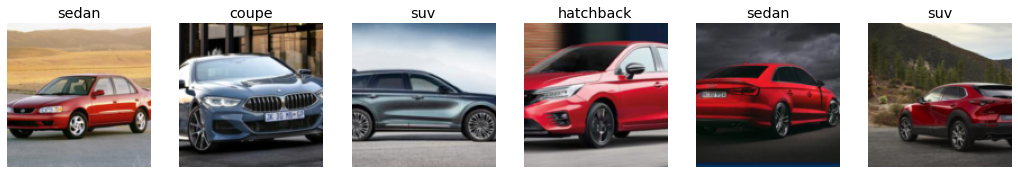

In [84]:
dls.valid.show_batch(max_n=6, nrows=1)

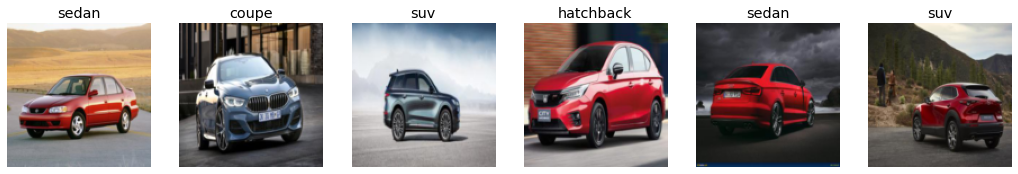

In [85]:
cars = cars.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = cars.dataloaders(path)
dls.valid.show_batch(max_n=6, nrows=1)

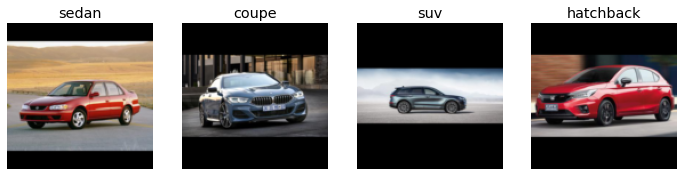

In [86]:
cars = cars.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = cars.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

#I prefer this padding method because it puts the images in the right ratio

In [87]:
# cars = cars.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
# dls = cars.dataloaders(path)
# dls.valid.show_batch(max_n=4, nrows=1)

#if training for more than 10 epochs, this may be more useful

In [88]:
# cars = cars.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
# dls = cars.dataloaders(path)
# dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [89]:
# cars_aug = cars.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
# dls_aug = cars.dataloaders(path)

In [90]:
#training the model using a pretrained resnet model

# learn = vision_learner(dls_aug, resnet18, metrics=error_rate)
# learn.fine_tune(5)

In [91]:
# learn.show_results()

In [92]:
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()

I got terrible outputs, high error rate and high training loss.
Indicative of the fact that the isn't well labelled so it's learning poorly so the model isn't able to learn out current data well due to poor labelling and it's probably the first time it's being asked to classify this
* I can try another pretained model, see if it performs better

In [93]:
cars_train = cars.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls_train = cars.dataloaders(path)

In [137]:
learn = vision_learner(dls_train, resnet34, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,2.393346,2.451444,0.674419,00:13


epoch,train_loss,valid_loss,error_rate,time
0,2.303586,2.098620,0.720930,00:23
1,2.049518,1.717727,0.627907,00:23
2,1.693612,1.112642,0.558140,00:21
3,1.458916,0.852173,0.348837,00:20
4,1.273897,0.784039,0.279070,00:18
5,1.156711,0.769933,0.255814,00:18


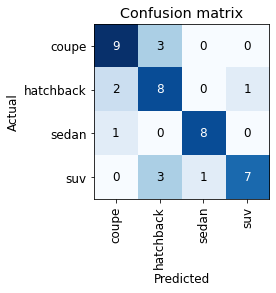

In [138]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

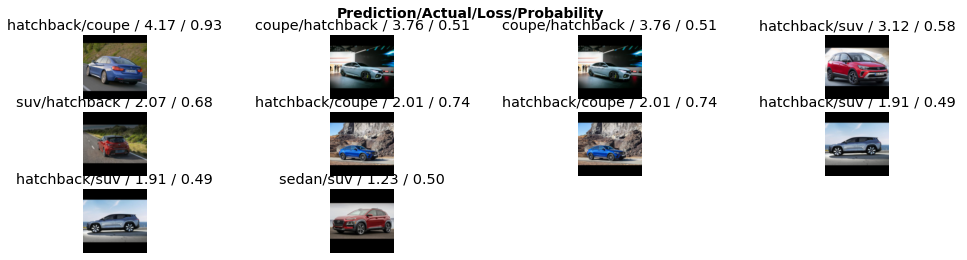

In [139]:
#visualizing the top losses
interp.plot_top_losses(10, figsize=(17,4))

In [136]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [98]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [140]:
learn.export()

In [141]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [142]:
learn_inf = load_learner(path/'export.pkl')

In [143]:
learn_inf.predict('hatchback.jpg')

('sedan', TensorBase(2), TensorBase([0.0687, 0.1311, 0.7692, 0.0310]))

In [144]:
learn_inf.predict('suv.jpg')

('suv', TensorBase(3), TensorBase([0.1340, 0.0661, 0.0575, 0.7423]))

In [145]:
learn_inf.predict('sedan.jpg')#xxxxx

('hatchback', TensorBase(1), TensorBase([0.0338, 0.5274, 0.0150, 0.4237]))

In [146]:
learn_inf.predict('coupe.jpg')

('coupe', TensorBase(0), TensorBase([0.6659, 0.0585, 0.0341, 0.2415]))

In [147]:
learn_inf.dls.vocab

['coupe', 'hatchback', 'sedan', 'suv']

In [148]:
from fastai.vision.all import *
import gradio as gr

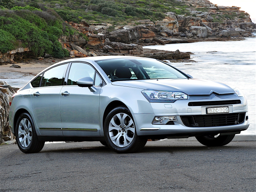

In [149]:
im = PILImage.create("sedan.jpg")
im.thumbnail((256, 256))
im

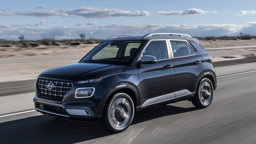

In [150]:
im2 = PILImage.create("suv.jpg")
im2.thumbnail((256, 256))
im2

In [151]:
learn = load_learner('export.pkl')

%time
learn.predict(im)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 8.11 µs


('hatchback', TensorBase(1), TensorBase([0.0367, 0.5353, 0.0316, 0.3965]))

In [152]:
learn = load_learner('export.pkl')

%time
learn.predict(im2)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


('suv', TensorBase(3), TensorBase([0.1035, 0.0866, 0.0608, 0.7491]))

In [153]:
categories = ("sedan", "suv", "coupe", "hatchback")


#changing the tensors to a normal floating point number
def classify_images(img):
  pred, idx, probs = learn.predict(img)
  return dict(zip (categories, map(float, probs)))

In [154]:
classify_images(im)

{'sedan': 0.03665478900074959,
 'suv': 0.5353232026100159,
 'coupe': 0.03156544640660286,
 'hatchback': 0.3964565396308899}

In [155]:
classify_images(im2)

{'sedan': 0.10346920788288116,
 'suv': 0.08663474023342133,
 'coupe': 0.06079832836985588,
 'hatchback': 0.7490977644920349}

In [156]:
image = gr.inputs.Image(shape= (192, 192))
label = gr.outputs.Label()
examples = ['sedan.jpg', 'suv.jpg', "hatchback.jpg", "coupe.jpg"]

intf = gr.Interface(fn = classify_images, inputs=image, outputs=label, examples=examples)
intf.launch(inline = False, share=True)

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://037478e1-c322-4a56.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
